# Diagnoza przewlekłej choroby nerek

W poniższym projekcie zostanie zbudowane kilka modeli diagnozy przewlekłej choroby nerek w oparciu o zbiór danych pozyskany z [kaggle] (https://www.kaggle.com/mansoordaku/ckdisease).
Zbiór został udostępniony przez UCI Machine Learning Repository.
#
### Etapy projektu:
1. Proces przetwarzania danych
    1.1. Opis danych
    1.2. Wczytanie danych
    1.3. Mapowanie wartości
    1.4. Uzupełnienie brakujących wartości
    1.5. Macierz korelacji
2. Proces modelowania
    2.1. Podział zbioru na train/test
    2.2. Utworzenie modeli prostych
    2.3. Wyniki dla modeli prostych
    2.4. Utworzenie sieci neuronowych
    2.5. Wyniki dla sieci neuronowych i modeli prostych
3. Podsumowanie

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Proces przetwarzania danych

## 1.1. Opis danych

Dane zostały zbierane przez ponad 2 miesiące w szpitalu w Indiach, gdzie udało się pozyskać 400 próbek.
Dane zawierają 25 właściwości tj. wiek, ciśnienie krwi, ilośc czerwonych krwinek itp.


Opis kolumn zgodnie z dostępnym na stronie UCI:

> `age` - wiek pacjenta (age)
> `bp` - ciśnienie krwi (blood pressure)
> `sg` - gęstość względna (specific gravity)
> `al` - poziom albumin (albumin)
> `su` - poziom cukru (sugar)
> `rbc` - poziom czerwonycj krwinek (red blood cells)
> `pc` - ilość martwych neutrofili (pus cell)
> `pcc` - obecność zbitych mas ropnych (pus cell clumps)
> `ba` - obecność bakterii (bacteria)
> `bgr` - poziom cukru w losowym teście (blood glucose random)
> `bu` - stężenie mocznika we krwi (blood urea)
> `sc` - stężenie kreatyniny w surowicy (serum creatinine)
> `sod` - poziom sodu (sodium)
> `pot` - poziom potasu (potassium)
> `hemo` - poziom hemoglobiny (hemoglobin)
> `pcv` - hematokryt - objętość czerwonych krwinek na litr krwi (packed cell volume)
> `wc` - ilość białych krwinek (white blood cell count)
> `rc` - ilość czerwonych krwinek (red blood cell count)
> `htn` - nadciśnienie (hypertension)
> `dm` - cukrzyca (diabetes mellitus)
> `cad` - choroba niedokrwienna serca (coronary artery disease)
> `appet` - apetyt (appetite)
> `pe` - obrzęk (pedal edema)
> `ane` - anemia (anemia)
> `class` - klasyfikacja wystąpienia choroby (class)

## 1.2. Wczytanie danych

In [2]:
data = pd.read_csv('data/kidney_disease.csv', index_col=0)
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


Możemy zobaczyć, że w zbiorze danych brakuje niektórych wartości oraz pojawiają się NaNy.

Zobaczmy z jakimi rodzajami danych się zetkniemy i czy wszystkie dane są prawidłowe.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [4]:
for i in data.columns:
    print('unique values in "{}":\n'.format(i),data[i].unique())

unique values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in "bp":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in "sg":
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in "al":
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in "su":
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in "rbc":
 [nan 'normal' 'abnormal']
unique values in "pc":
 ['normal' 'abnormal' nan]
unique values in "pcc":
 ['notpresent' 'present' nan]
unique values in "ba":
 ['notpresent' 'present' nan]
unique values in "bgr":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79.

## 1.3. Mapowanie wartości

Widzimy, że w niektórych kolumnach mamy literówki, które trzeba naprawić.
Wszystkie dane kategoryczne przyjmują dwie wartości więc łatwo będzie je zmapować na wartości numeryczne.

Naprawmy literówki, które się tu znalazły i dodatkowo zmapujmy wszystkie źle sparsowane NaNy.

"pcv" - '\t?' na NaN, '\t43' na 43
"wc" - '\t6200' na 6200, '\t?' na NaN, '\t8400' na 8400
"rc" - '\t?' na NaN
"dm" - ' yes' na yes, '\tno' na no, '\tyes' na yes
"cad" - '\tno' na no
"classification" - 'ckd/t' na 'ckd'

In [5]:
data["pcv"] = data.pcv.replace({"\t43":43, "\t?":np.NaN})
data["wc"] = data.wc.replace({"\t6200":6200, "\t?":np.NaN, "\t8400":8400})
data["rc"] = data.rc.replace({"\t?":np.NaN})
data["dm"] = data.dm.replace({" yes":"yes", "\tno":"no", "\tyes":"yes" })
data["cad"] = data.cad.replace({"\tno":"no"})
data["classification"] = data.classification.replace({"ckd\t":"ckd"})

In [6]:
data = data.replace("\t?", np.NaN)

In [7]:
for i in data.columns:
    print('unique values in "{}":\n'.format(i),data[i].unique())

unique values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in "bp":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in "sg":
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in "al":
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in "su":
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in "rbc":
 [nan 'normal' 'abnormal']
unique values in "pc":
 ['normal' 'abnormal' nan]
unique values in "pcc":
 ['notpresent' 'present' nan]
unique values in "ba":
 ['notpresent' 'present' nan]
unique values in "bgr":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79.

Zmapujmy wartości obiektowe z kolumn (rbc, pc, pcc, ba, pcv, wc, rc, htn, dm, cad, appet, pe, ane, classification)  na wartości liczbowe.

In [8]:
data["rbc"] = data.rbc.replace({"normal":0, "abnormal":1})
data["pc"] = data.pc.replace({"normal":0, "abnormal":1})
data["pcc"] = data.pcc.replace({"notpresent":0, "present":1})
data["ba"] = data.ba.replace({"notpresent":0, "present":1})
data["htn"] = data.htn.replace({"no":0, "yes":1})
data["dm"] = data.dm.replace({"no":0, "yes":1})
data["cad"] = data.cad.replace({"no":0, "yes":1})
data["appet"] = data.appet.replace({"good":0, "poor":1})
data["pe"] = data.cad.replace({"no":0, "yes":1})
data["ane"] = data.ane.replace({"no":0, "yes":1})
data["classification"] = data.classification.replace({"notckd":0, "ckd":1})

In [9]:
data = data.apply(pd.to_numeric)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    float64
 6   pc              335 non-null    float64
 7   pcc             396 non-null    float64
 8   ba              396 non-null    float64
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             329 non-null    float64
 16  wc              294 non-null    float64
 17  rc              269 non-null    flo

Zobaczmy jak rozkładają się wartości NaN

In [11]:
data.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  2
ane                 1
classification      0
dtype: int64

##  1.4. Uzupełnienie brakujących warości

Najwięcej wartości brakuje nam w kolumnach rbc, wc, rc oraz sod, pot, pcv. W tych kolumnach oraz w kolumnach kategorycznych NaNy zastąpimy wartościami losowymi, a w kolumnach gdzie brakuje mniejszej ilości danych zastąpimy średnią wartością z tych kolumn.

In [12]:
data.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,391.000000,388.000000,353.000000,354.000000,351.000000,248.000000,335.000000,396.000000,396.000000,356.000000,...,329.000000,294.000000,269.000000,398.000000,398.000000,398.000000,399.000000,398.000000,399.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.189516,0.226866,0.106061,0.055556,148.036517,...,38.884498,8406.122449,4.707435,0.369347,0.344221,0.085427,0.205514,0.085427,0.150376,0.625000
std,17.169714,13.683637,0.005717,1.352679,1.099191,0.392711,0.419431,0.308305,0.229351,79.281714,...,8.990105,2944.474190,1.025323,0.483235,0.475712,0.279868,0.404584,0.279868,0.357888,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,...,32.000000,6500.000000,3.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121.000000,...,40.000000,8000.000000,4.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163.000000,...,45.000000,9800.000000,5.400000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
for column in ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'hemo']:
    data[column].fillna((data[column].mean()), inplace=True)

In [14]:
data.isnull().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                 0
bu                  0
sc                  0
sod                87
pot                88
hemo                0
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  2
ane                 1
classification      0
dtype: int64

In [15]:
def random_value_imputation(feature):
    random_sample = data[feature].dropna().sample(data[feature].isna().sum())
    random_sample.index = data[data[feature].isnull()].index
    data.loc[data[feature].isnull(), feature] = random_sample

In [16]:
for column in ['rbc', 'pc', 'pcc', 'ba', 'sod', 'pot', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']:
    random_value_imputation(column)

In [17]:
data.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [18]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.000000,...,44.0,7800.0,5.2,1.0,1.0,0.0,0.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,148.036517,...,38.0,6000.0,5.9,0.0,0.0,0.0,0.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.000000,...,31.0,7500.0,5.5,0.0,1.0,0.0,1.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.000000,...,32.0,6700.0,3.9,1.0,0.0,0.0,1.0,0.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.000000,...,35.0,7300.0,4.6,0.0,0.0,0.0,0.0,0.0,0.0,1


Jeszcze na koniec ustalmy typy danych.

In [54]:
data = data.astype({"age": int, "bp": int, "sg": float, "al": int, "su": int, "rbc": int, "pc": int, "pcc": int, "ba": int, "bgr": int, "bu": float, "sc": float, "sod": int, "pot": float, "hemo": float, "pcv": int, "wc": int, "rc": float, "htn":int,
                    "dm": int, "cad": int, "appet": int, "pe": int, "ane": int, "classification": int})

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    int32  
 1   bp              400 non-null    int32  
 2   sg              400 non-null    float64
 3   al              400 non-null    int32  
 4   su              400 non-null    int32  
 5   rbc             400 non-null    int32  
 6   pc              400 non-null    int32  
 7   pcc             400 non-null    int32  
 8   ba              400 non-null    int32  
 9   bgr             400 non-null    int32  
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    int32  
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    int32  
 16  wc              400 non-null    int32  
 17  rc              400 non-null    flo

C:\Users\Patutek\AppData\Local\Temp\ipykernel_13752\3203298185.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


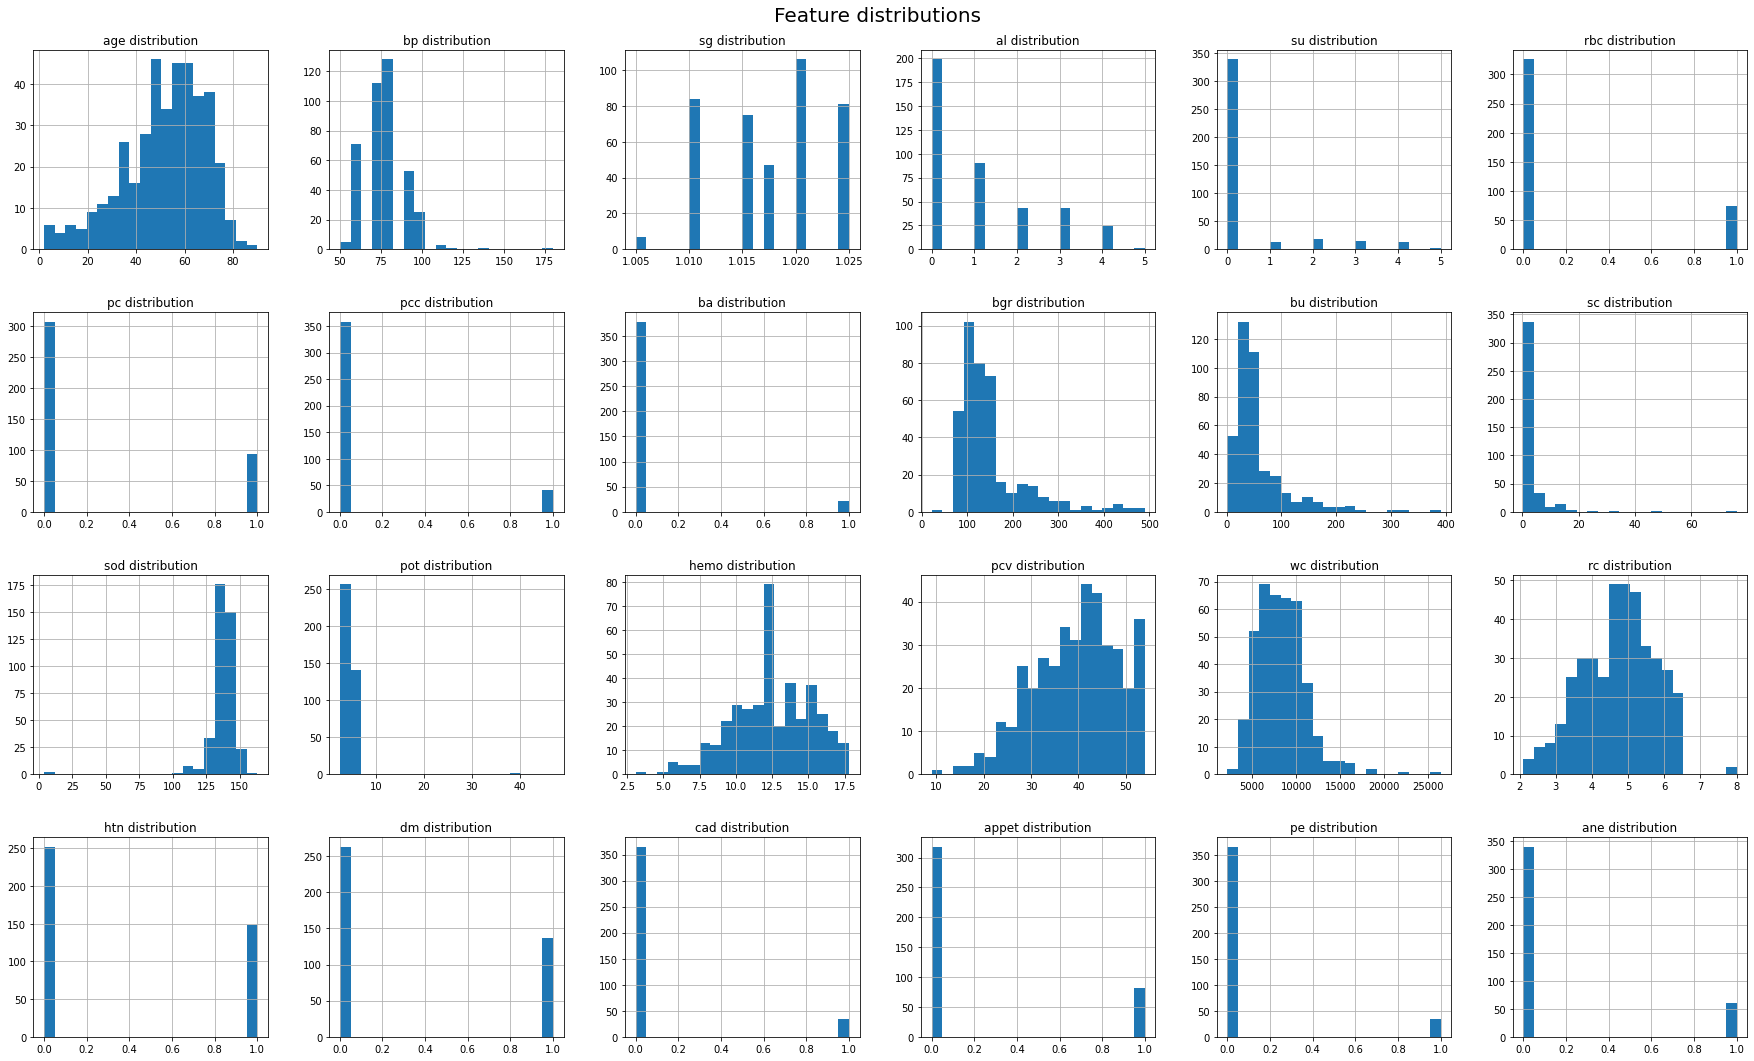

In [21]:
fig, axs = plt.subplots(4, 6, figsize=(25,15))

i = 0
j = 0

for feature in list(data.columns[:-1]):
    data[feature].hist(bins=20,ax=axs[i,j])
    axs[i,j].set_title(feature + " distribution")
    j=j+1
    if j == 6:
        i=i+1
        j=0

fig.tight_layout(pad=3.0)
fig.suptitle("Feature distributions", fontsize=20, verticalalignment='bottom')
fig.show()

## 1.5. Macierz korelacji

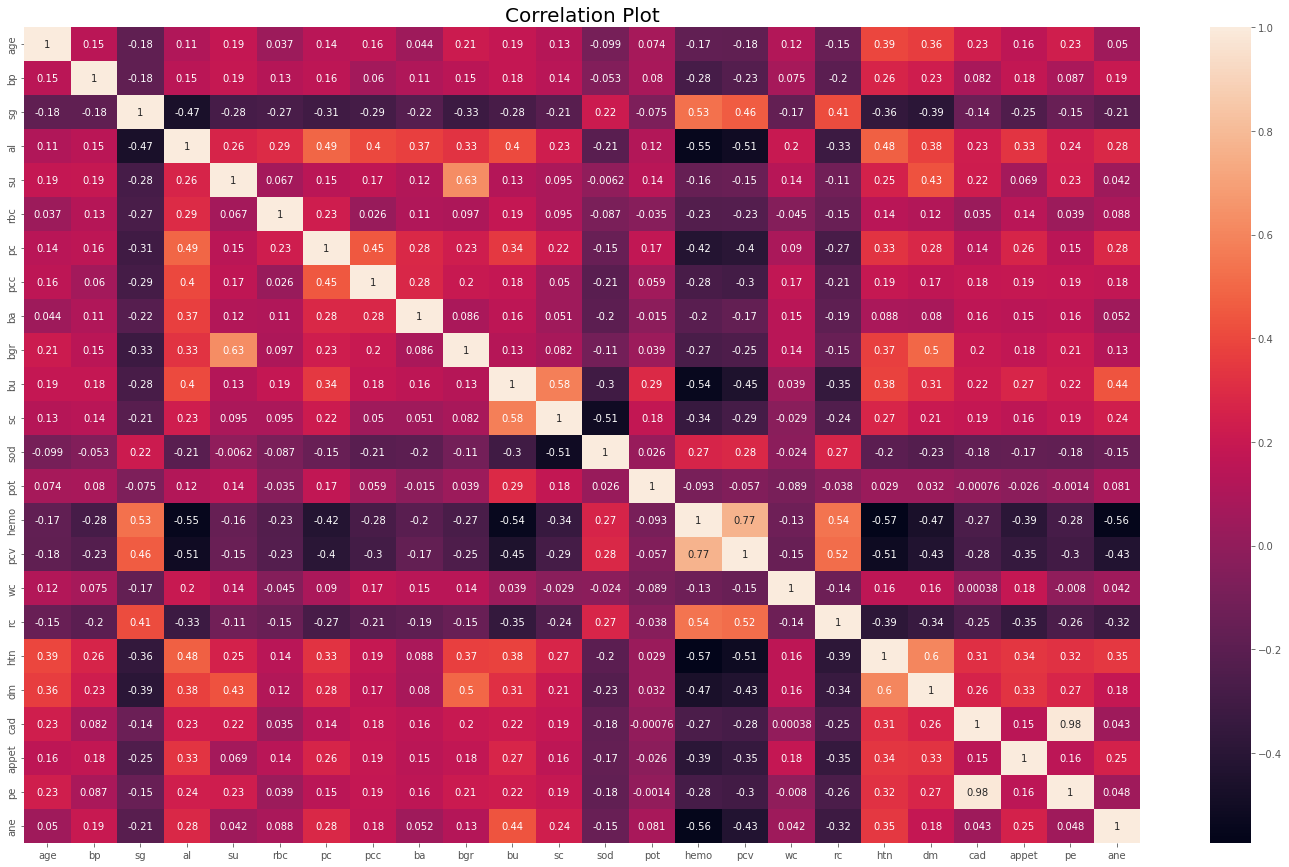

In [22]:
import seaborn as sns

plt.rcParams['figure.figsize'] = (25, 15)
plt.style.use('ggplot')

sns.heatmap(data.loc[:, data.columns != "classification"].corr(), annot=True)
plt.title('Correlation Plot', fontsize = 20)
plt.show()

In [23]:
corr = data.loc[:, data.columns != "classification"].corr()
corr

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
age,1.000000,0.149522,-0.180310,0.113972,0.187720,0.037230,0.144887,0.159293,0.043727,0.214435,...,-0.174932,-0.180661,0.119776,-0.150659,0.393099,0.363334,0.232467,0.157888,0.233145,0.050237
bp,0.149522,1.000000,-0.182068,0.146060,0.190277,0.128354,0.159032,0.059917,0.112423,0.148982,...,-0.279455,-0.225539,0.074961,-0.201185,0.264165,0.228450,0.081558,0.177913,0.086935,0.194910
sg,-0.180310,-0.182068,1.000000,-0.466664,-0.282115,-0.268619,-0.306396,-0.290663,-0.220792,-0.326317,...,0.531755,0.460807,-0.168964,0.413690,-0.359111,-0.393190,-0.140259,-0.246822,-0.154803,-0.213276
al,0.113972,0.146060,-0.466664,1.000000,0.262564,0.293307,0.491833,0.400270,0.368222,0.326277,...,-0.548687,-0.511480,0.195990,-0.326663,0.475862,0.377038,0.226106,0.330264,0.236254,0.281546
su,0.187720,0.190277,-0.282115,0.262564,1.000000,0.066755,0.149645,0.168091,0.119399,0.629810,...,-0.156876,-0.148167,0.135548,-0.113862,0.251941,0.430514,0.222946,0.069216,0.229301,0.042464
rbc,0.037230,0.128354,-0.268619,0.293307,0.066755,1.000000,0.225496,0.025833,0.110987,0.096943,...,-0.234692,-0.227479,-0.045182,-0.147208,0.141621,0.117426,0.034748,0.140824,0.039478,0.088352
pc,0.144887,0.159032,-0.306396,0.491833,0.149645,0.225496,1.000000,0.448565,0.282566,0.228361,...,-0.424515,-0.398140,0.090070,-0.273004,0.325939,0.276208,0.143731,0.262924,0.150564,0.282591
pcc,0.159293,0.059917,-0.290663,0.400270,0.168091,0.025833,0.448565,1.000000,0.275082,0.197591,...,-0.275763,-0.296264,0.172413,-0.209942,0.193574,0.165236,0.182547,0.189688,0.188029,0.175861
ba,0.043727,0.112423,-0.220792,0.368222,0.119399,0.110987,0.282566,0.275082,1.000000,0.085932,...,-0.204954,-0.172070,0.145050,-0.186830,0.087672,0.080070,0.158143,0.149126,0.162395,0.052208
bgr,0.214435,0.148982,-0.326317,0.326277,0.629810,0.096943,0.228361,0.197591,0.085932,1.000000,...,-0.269132,-0.249209,0.142891,-0.151080,0.367107,0.500625,0.200414,0.176135,0.212427,0.126836


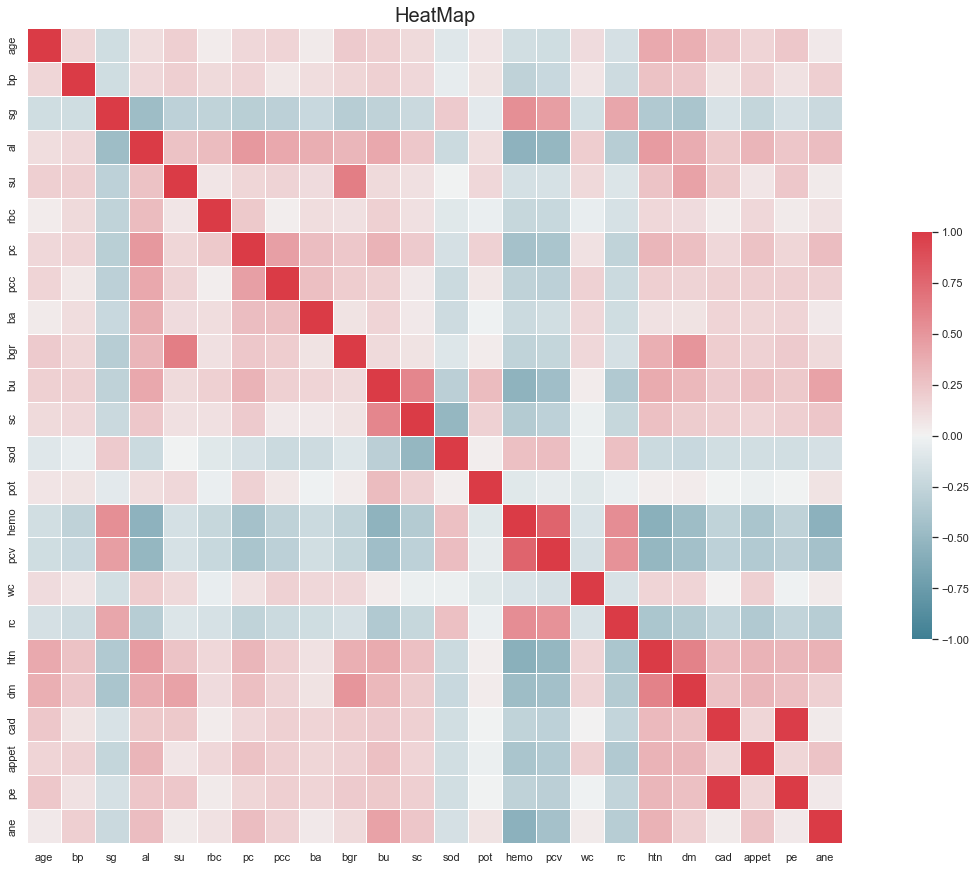

In [24]:
sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(25, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.title('HeatMap', fontsize = 20)
plt.show()

Na powyższych wykresach możemy zaobserwować wysoką korelację pomiędzy `pe` (obrzęk) a `cad` (choroba serca), `hemo` (poziom hemoglobiny) a `pcv` (hematokryt) a także `bgr` (poziom cukru w losowym teście) a `sc` (stężenie kreatyniny).
Widzimy też odwrotną korelację pomiędzy `hemo` a `sc`

# 2. Modelowanie danych

## 2.1. Podział na test i train

In [25]:
from sklearn.model_selection import train_test_split

X = data.loc[:, data.columns != "classification"]
y = data["classification"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(240, 24) (240,)
(160, 24) (160,)


Używając GridSearchCV wybierzemy najlepsze parametry dla poniższych modeli.
## 2.2. Utworzenie modeli prostych:

1. Logistic Regression
2. Linear SVM Classification
3. Polynomial SVM Classification
4. RBF SVM Classification
5. Decision Tree Classifier
6. Bagging Classifier
7. Random Forest Classifier
8. Extra Trees Classifier
9. Ada Boost Classifier
10. XGBoost Classifier
11. Gradient Boosting Classifier

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import model_selection

from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from mlxtend.plotting import plot_decision_regions

seed=123
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed)

### Logistic Regression

In [27]:
pipeline_logistic_reg = Pipeline([('preprocessing', StandardScaler()), ('classifier', LogisticRegression(n_jobs=-1))])

param_grid_logistic_reg = {
    'preprocessing': [StandardScaler(), None],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_logistic_reg = GridSearchCV(pipeline_logistic_reg, param_grid_logistic_reg, cv=kfold, return_train_score=True)
grid_logistic_reg.fit(X_train, y_train)
grid_logistic_reg.best_params_

{'classifier__C': 1, 'preprocessing': StandardScaler()}

### Linear SVM Classification

In [28]:
pipeline_SVM_linear = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel="linear", probability=True))])

param_grid_SVM_linear = {
    'preprocessing': [StandardScaler(), None],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}
grid_SVM_linear = GridSearchCV(pipeline_SVM_linear, param_grid_SVM_linear, cv=kfold, return_train_score=True)

grid_SVM_linear.fit(X_train, y_train)
grid_SVM_linear.best_params_

{'classifier__C': 0.1, 'preprocessing': StandardScaler()}

### Polynomial SVM Classification

In [ ]:
pipeline_SVM_poly = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel="poly", probability=True))])

param_grid_SVM_poly = {'preprocessing': [StandardScaler(), None],
                'classifier__C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                'classifier__coef0': [0.001, 0.01, 0.1, 1, 10, 100],
                'classifier__degree': [1, 2, 3, 4, 5, 6]}
grid_SVM_poly = GridSearchCV(pipeline_SVM_poly, param_grid_SVM_poly, cv=kfold, return_train_score=True)

grid_SVM_poly.fit(X_train, y_train)
grid_SVM_poly.best_params_

### RBF SVM Classification

In [30]:
pipeline_SVM_rbf = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(probability=True))])

param_grid_SVM_rbf = {
    'preprocessing': [StandardScaler(), None],
    'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_SVM_rbf = GridSearchCV(pipeline_SVM_rbf, param_grid_SVM_rbf, cv=kfold, return_train_score=True)

grid_SVM_rbf.fit(X_train, y_train)
grid_SVM_rbf.best_params_

{'classifier__C': 10,
 'classifier__gamma': 0.01,
 'preprocessing': StandardScaler()}

### Decision Tree Classifier

In [32]:
pipeline_decision_tree = Pipeline([('preprocessing', StandardScaler()), ('classifier', DecisionTreeClassifier())])

param_grid_decision_tree = {
    'preprocessing': [StandardScaler(), None],
    'classifier__max_depth': [1, 2, 3, 4, 5, 10, 20],
    'classifier__max_leaf_nodes': [None, 5, 10, 20, 50, 100],
}

grid_decision_tree = GridSearchCV(pipeline_decision_tree, param_grid_decision_tree, cv=kfold, return_train_score=True)

grid_decision_tree.fit(X_train, y_train)
grid_decision_tree.best_params_

{'classifier__max_depth': 5,
 'classifier__max_leaf_nodes': 10,
 'preprocessing': None}

### Bagging Classifier

In [33]:
pipeline_bagging = Pipeline([('preprocessing', StandardScaler()), ('classifier', BaggingClassifier())])

param_grid_bagging = {
    'preprocessing': [StandardScaler(), None],
    'classifier__max_samples' : [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 1]
}

grid_bagging = GridSearchCV(pipeline_bagging, param_grid_bagging, cv=kfold, return_train_score=True)

grid_bagging.fit(X_train, y_train)
grid_bagging.best_params_

{'classifier__max_samples': 0.3, 'preprocessing': StandardScaler()}

### Random Forest Classifier

In [34]:
pipeline_random_forest = Pipeline([('preprocessing', StandardScaler()), ('classifier', RandomForestClassifier(n_jobs=-1))])

param_grid_random_forest = {
    'preprocessing': [StandardScaler(), None],
    'classifier__n_estimators' : [1, 2, 3, 4, 5, 10, 50],
    'classifier__max_leaf_nodes' : [2, 4, 8, 16, 32, 64],
}

grid_random_forest = GridSearchCV(pipeline_random_forest, param_grid_random_forest, cv=kfold, return_train_score=True)

grid_random_forest.fit(X_train, y_train)
grid_random_forest.best_params_

{'classifier__max_leaf_nodes': 8,
 'classifier__n_estimators': 4,
 'preprocessing': StandardScaler()}

### Extra Trees Classifier

In [35]:
pipeline_extra_trees = Pipeline([('preprocessing', StandardScaler()), ('classifier', ExtraTreesClassifier(n_jobs=-1))])

param_grid_extra_trees = {
    'preprocessing': [StandardScaler(), None],
    'classifier__n_estimators' : [5, 10, 50, 100],
    'classifier__max_leaf_nodes' : [2, 4, 8, 16, 32, 64],
}

grid_extra_trees = GridSearchCV(pipeline_extra_trees, param_grid_extra_trees, cv=kfold, return_train_score=True)

grid_extra_trees.fit(X_train, y_train)
grid_extra_trees.best_params_

{'classifier__max_leaf_nodes': 32,
 'classifier__n_estimators': 50,
 'preprocessing': StandardScaler()}

### Ada Boost Classifier

In [36]:
pipeline_ada_boost = Pipeline([('preprocessing', StandardScaler()), ('classifier', AdaBoostClassifier())])

param_grid_ada_boost = {
    'preprocessing': [StandardScaler(), None],
    'classifier__n_estimators' : [1, 5, 10, 50, 100, 500, 600, 700],
    'classifier__learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.5, 0.7, 1],
}

grid_ada_boost = GridSearchCV(pipeline_ada_boost, param_grid_ada_boost, cv=kfold, return_train_score=True)

grid_ada_boost.fit(X_train, y_train)
grid_ada_boost.best_params_

{'classifier__learning_rate': 1,
 'classifier__n_estimators': 100,
 'preprocessing': StandardScaler()}

### XGBoost Classifier

In [37]:
pipeline_xgboost = Pipeline([('preprocessing', StandardScaler()), ('classifier', XGBClassifier())])

param_grid_xgboost = {
    'preprocessing': [StandardScaler(), None],
    'classifier__n_estimators' : [1, 5, 10, 50, 100, 500, 600, 700],
    'classifier__learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.5, 0.7, 1],
}

grid_xgboost = GridSearchCV(pipeline_xgboost, param_grid_xgboost, cv=kfold, return_train_score=True)

grid_xgboost.fit(X_train, y_train)
grid_xgboost.best_params_

{'classifier__learning_rate': 1,
 'classifier__n_estimators': 500,
 'preprocessing': StandardScaler()}

### Gradient Boosting Classifier

In [38]:
from time import time

In [41]:
pipeline_gradient_boosting = Pipeline([('preprocessing', StandardScaler()), ('classifier', GradientBoostingClassifier())])

param_grid_gradient_boosting = {
    'preprocessing': [StandardScaler(), None],
    'classifier__n_estimators' : [5, 10, 50, 100, 500, 1000],
    'classifier__learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.5, 0.7, 1],
}

grid_gradient_boosting = GridSearchCV(pipeline_gradient_boosting, param_grid_gradient_boosting, cv=kfold, return_train_score=True, n_jobs=-1)

grid_gradient_boosting.fit(X_train, y_train)
grid_gradient_boosting.best_params_

{'classifier__learning_rate': 0.5,
 'classifier__n_estimators': 100,
 'preprocessing': StandardScaler()}

## 2.3. Wyniki dla modeli prostych

In [46]:
from sklearn import metrics

models = []

models.append(('Logistic regression', grid_logistic_reg.best_estimator_))
models.append(('SVM linear', grid_SVM_linear.best_estimator_))
#models.append(('SVM poly', grid_SVM_poly.best_estimator_))
models.append(('SVM rbf', grid_SVM_rbf.best_estimator_))
models.append(('DecisionTreeClassifier', grid_decision_tree.best_estimator_))
models.append(('BaggingClassifier', grid_bagging.best_estimator_))
models.append(('RandomForestClassifier', grid_random_forest.best_estimator_))
models.append(('ExtraTreesClassifier', grid_extra_trees.best_estimator_))
models.append(('AdaBoostClassifier', grid_ada_boost.best_estimator_))
models.append(('XGBoost Classifier', grid_xgboost.best_estimator_))
models.append(('GradientBoostingClassifier', grid_gradient_boosting.best_estimator_))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []

for name, model in models:
    precision_score.append(metrics.precision_score(y_test , model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))
    roc_auc_score.append(metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]))

In [48]:
results = {'precision_score': precision_score,
     'recall_score': recall_score,
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'roc_auc_score' : roc_auc_score
     }

df = pd.DataFrame(data=results)
df.insert(loc=0, column='Method', value=['Logistic regression', 'SVM linear', 'SVM rbf',
                 'DecisionTreeClassifier', 'BaggingClassifier', 'RandomForestClassifier',
                 'ExtraTreesClassifier', 'AdaBoostClassifier', 'XGBoostClassifier', 'GradientBoostingClassifier'])
print(df)

                       Method  precision_score  recall_score  f1_score  \
0         Logistic regression         0.990000          0.99  0.990000   
1                  SVM linear         0.989899          0.98  0.984925   
2                     SVM rbf         0.980000          0.98  0.980000   
3      DecisionTreeClassifier         0.941176          0.96  0.950495   
4           BaggingClassifier         0.960784          0.98  0.970297   
5      RandomForestClassifier         0.979798          0.97  0.974874   
6        ExtraTreesClassifier         0.970874          1.00  0.985222   
7          AdaBoostClassifier         0.980392          1.00  0.990099   
8           XGBoostClassifier         0.980392          1.00  0.990099   
9  GradientBoostingClassifier         0.980392          1.00  0.990099   

   accuracy_score  roc_auc_score  
0         0.98750       0.999667  
1         0.98125       0.999667  
2         0.97500       0.999000  
3         0.93750       0.930000  
4         

## 2.4. Utworzenie sieci neuronowych
Wykorzystane modele:

1. MLPRegressor
2. MLPClassifier

In [50]:
from sklearn.neural_network import MLPClassifier, MLPRegressor

### MLP Classifier

In [51]:
pipeline_MLPC = Pipeline([('preprocessing', StandardScaler()), ('classifier', MLPClassifier())])

param_grid_MLPC = {
    'preprocessing': [StandardScaler(), None],
    'classifier__hidden_layer_sizes': [(20,10)],
    'classifier__learning_rate_init': [0.001, 0.01, 0.1],
    'classifier__max_iter': [100, 500, 1000],
    'classifier__batch_size': [8, 16,32],
}

grid_MLPC = GridSearchCV(pipeline_MLPC, param_grid_MLPC, cv=kfold, return_train_score=True, n_jobs=-1)

grid_MLPC.fit(X_train, y_train)
grid_MLPC.best_params_

{'classifier__batch_size': 8,
 'classifier__hidden_layer_sizes': (20, 10),
 'classifier__learning_rate_init': 0.001,
 'classifier__max_iter': 100,
 'preprocessing': StandardScaler()}

### MLP Regressor

In [52]:
pipeline_MLPR = Pipeline([('preprocessing', StandardScaler()), ('classifier', MLPRegressor())])

param_grid_MLPR = {
    'preprocessing': [StandardScaler(), None],
    'classifier__hidden_layer_sizes': [(20,10)],
    'classifier__learning_rate_init': [0.0001, 0.001, 0.01, 0.1, 1],
    'classifier__max_iter': [5000, 50000, 500000],
    'classifier__batch_size':[10, 20, 30, 40],
}

grid_MLPR = GridSearchCV(pipeline_MLPR, param_grid_MLPR, cv=kfold, return_train_score=True, n_jobs=-1)

grid_MLPR.fit(X_train, y_train)
grid_MLPR.best_params_

{'classifier__batch_size': 20,
 'classifier__hidden_layer_sizes': (20, 10),
 'classifier__learning_rate_init': 0.1,
 'classifier__max_iter': 500000,
 'preprocessing': StandardScaler()}

## 2.5. Wyniki dla sieci neuronowych i modeli prostych

In [56]:
models = []

models.append(('Logistic regression', grid_logistic_reg.best_estimator_))
models.append(('SVM linear', grid_SVM_linear.best_estimator_))
#models.append(('SVM poly', grid_SVM_poly.best_estimator_))
models.append(('SVM rbf', grid_SVM_rbf.best_estimator_))
models.append(('DecisionTreeClassifier', grid_decision_tree.best_estimator_))
models.append(('BaggingClassifier', grid_bagging.best_estimator_))
models.append(('RandomForestClassifier', grid_random_forest.best_estimator_))
models.append(('ExtraTreesClassifier', grid_extra_trees.best_estimator_))
models.append(('AdaBoostClassifier', grid_ada_boost.best_estimator_))
models.append(('XGBoost Classifier', grid_xgboost.best_estimator_))
models.append(('GradientBoostingClassifier', grid_gradient_boosting.best_estimator_))
models.append(('MLP Classifier', grid_MLPC.best_estimator_))
models.append(('MLP Regressor', grid_MLPR.best_estimator_))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []

for name, model in models:
    precision_score.append(metrics.precision_score(y_test , model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))
    roc_auc_score.append(metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]))

In [58]:
df = pd.DataFrame(data=results)
df.insert(loc=0, column='Method',
          value=['Logistic regression', 'SVM linear', 'SVM rbf',
                 'DecisionTreeClassifier', 'BaggingClassifier', 'RandomForestClassifier',
                 'ExtraTreesClassifier', 'AdaBoostClassifier', 'XGBoost' , 'GradientBoostingClassifier', 'MLP Classifier', 'MLPRegressor'])
print(df)

                        Method  precision_score  recall_score  f1_score  \
0          Logistic regression         0.990000          0.99  0.990000   
1                   SVM linear         0.989899          0.98  0.984925   
2                      SVM rbf         0.980000          0.98  0.980000   
3       DecisionTreeClassifier         0.941176          0.96  0.950495   
4            BaggingClassifier         0.960784          0.98  0.970297   
5       RandomForestClassifier         0.979798          0.97  0.974874   
6         ExtraTreesClassifier         0.970874          1.00  0.985222   
7           AdaBoostClassifier         0.980392          1.00  0.990099   
8                      XGBoost         0.980392          1.00  0.990099   
9   GradientBoostingClassifier         0.980392          1.00  0.990099   
10              MLP Classifier         0.990000          0.99  0.990000   

    accuracy_score  roc_auc_score  
0          0.98750       0.999667  
1          0.98125       0.

Budowanie modelu

In [62]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
from keras.callbacks import EarlyStopping
from keras import backend



backend.clear_session()

history = History()

model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2500      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 7,601
Trainable params: 7,601
Non-trainable params: 0
_________________________________________________________________


In [69]:
#early_stopping = EarlyStopping(patience=20, monitor="val_loss")

In [63]:
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [64]:
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32, epochs=200)
#, callbacks=[early_stopping, history]

Epoch 1/200
8/8 [==============================] - 1s 47ms/step - loss: 0.6641 - accuracy: 0.6250 - val_loss: 0.6595 - val_accuracy: 0.6250
Epoch 2/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6602 - accuracy: 0.6250 - val_loss: 0.6565 - val_accuracy: 0.6250
Epoch 3/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6567 - accuracy: 0.6250 - val_loss: 0.6532 - val_accuracy: 0.6250
Epoch 4/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6512 - accuracy: 0.6250 - val_loss: 0.6527 - val_accuracy: 0.6250
Epoch 5/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6471 - accuracy: 0.6250 - val_loss: 0.6441 - val_accuracy: 0.6250
Epoch 6/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6465 - accuracy: 0.6250 - val_loss: 0.6379 - val_accuracy: 0.6250
Epoch 7/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6382 - accuracy: 0.6250 - val_loss: 0.6335 - val_accuracy: 0.6250
Epoch 8/200
8/8 [=========

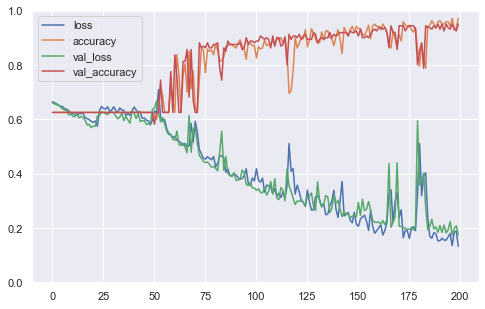

In [65]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [66]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.1753 - accuracy: 0.9500


[0.1753081977367401, 0.949999988079071]

In [72]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
predictions

5/5 [==============================] - 0s 2ms/step


array([[1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
    

# 3. Podsumowanie

Patrząc na wyniki, prawdopodobnie ze względu na wielkość zbioru, większość z typowo wykorzystywanych modeli jest w stanie dokonać poprawnje predykcji z wysoką precyzją.